In [1]:
# TODO:
'''
1.) Consistent figure sizes and colors
2.) Order notebook to answer questions
3.) Fill in any questions that don't have charts (yet)
4.) Answer questions 7-10
'''

"\n1.) Consistent figure sizes and colors\n2.) Order notebook to answer questions\n3.) Fill in any questions that don't have charts (yet)\n4.) Answer questions 7-10\n"

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
sns.set_palette("colorblind")

In [4]:
# Leftover data wrangling
kickstarter = pd.read_csv('C://Users/Tom/Documents/Kickstarter/master2.csv', index_col=0)
kickstarter.drop_duplicates(inplace=True)
kickstarter['launched_at'] = pd.to_datetime((kickstarter['launched_at']))
kickstarter['deadline'] = pd.to_datetime((kickstarter['deadline']))

In [5]:
kickstarter.head();

In [6]:
# Q1. How many Kickstarter projects are there? What percentage of them were successful?
original_success = kickstarter.groupby(by='state')['goal'].count()
new_state_success = kickstarter.groupby(by='new_state')['goal'].count()


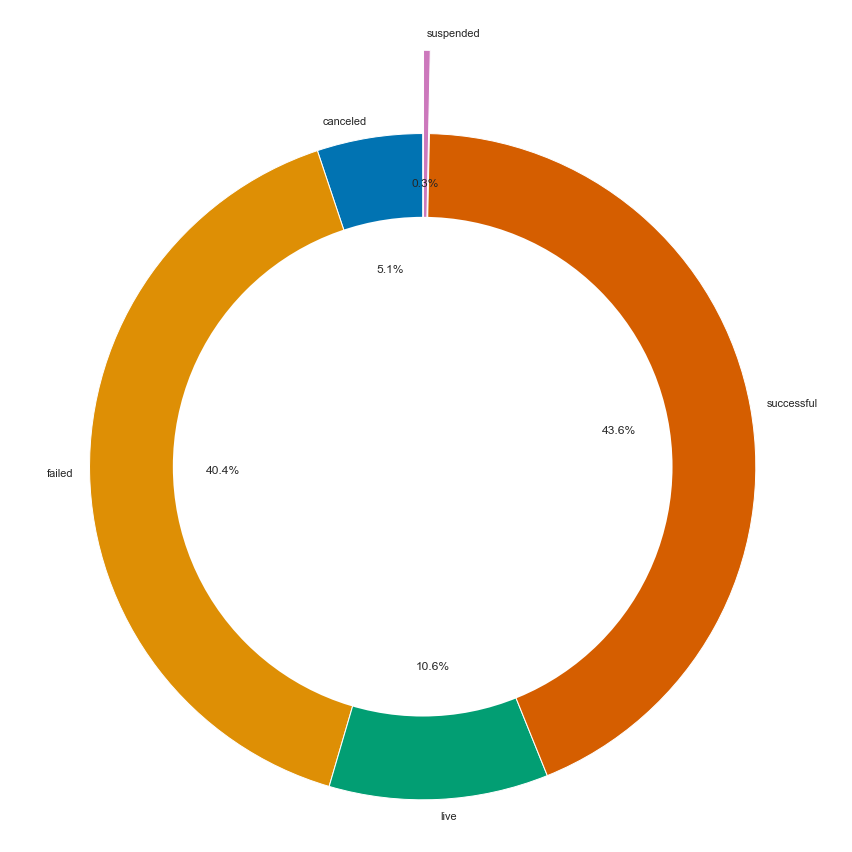

In [7]:
f, ax = plt.subplots(figsize=(12, 12))

original_success_labels = original_success.index.values.tolist()
original_success_sizes = original_success.values.tolist()

cmap = plt.cm.Greens
colors = cmap(np.linspace(0, 1, len(original_success_labels)))
#original_success_colors = colors

new_state_labels = new_state_success.index.values.tolist()
new_state_sizes = new_state_success.values.tolist()

#Plot
plt.pie(original_success_sizes, 
        labels=original_success_labels,
        labeldistance=1.05,
        startangle=90,
        explode=(0, 0, 0, 0, 1), 
        autopct='%.1f%%',
        radius=4)

#Draw circle
centre_circle = plt.Circle((0,0),3,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()


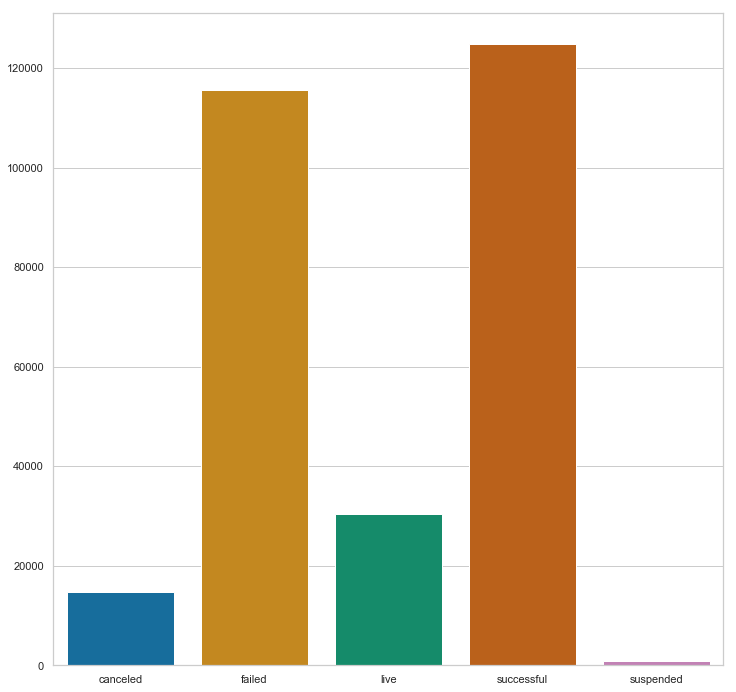

In [16]:
f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=original_success_labels, y=original_success_sizes);

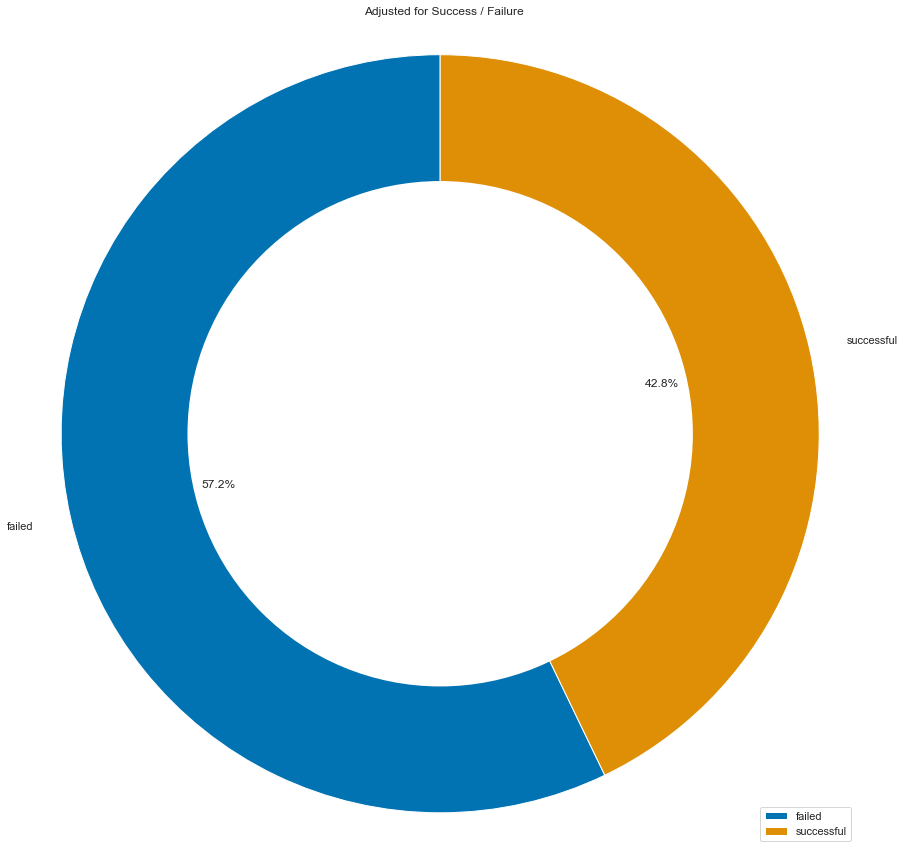

In [17]:
f, ax = plt.subplots(figsize=(12, 12))
# Show changes to "New state"

new_state_labels = new_state_success.index.values.tolist()
new_state_sizes = new_state_success.values.tolist()

#Plot
plt.pie(new_state_sizes, 
        labels=new_state_labels,
        labeldistance=1.1,
        startangle=90,
        explode=None, 
        autopct='%.1f%%',
        radius = 3,
        )

#Draw circle
centre_circle = plt.Circle((0,0),2,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title("Adjusted for Success / Failure")
plt.legend(new_state_labels)
plt.show()

In [37]:
#Q2. What are the top 10 most successful Kickstarter projects?
kickstarter.sort_values('usd_pledged', ascending = False).head(10);
# Bar chart with converted_USD

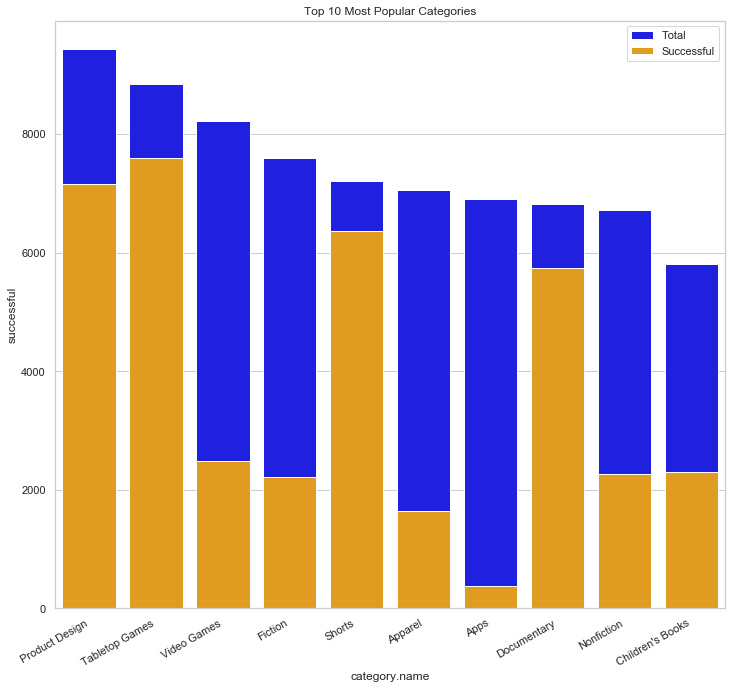

In [8]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

success_by_category_name = pd.pivot_table(kickstarter, index='category.name', columns='new_state', values='goal', aggfunc='count', fill_value = 0)
success_by_category_name['total'] = success_by_category_name['failed'] + success_by_category_name['successful'] 
success_by_category_name['success_rate'] = success_by_category_name['successful'] / success_by_category_name['total']
top10categories = success_by_category_name.sort_values(by='total', ascending=False).head(10).reset_index()

g = sns.barplot(x="category.name", y="total", data=top10categories, label="Total", color="blue")
h = sns.barplot(x="category.name", y="successful", data=top10categories, label="Successful", color="orange")

# Add a legend and informative axis label
ax.legend()
f.autofmt_xdate()
plt.title("Top 10 Most Popular Categories");

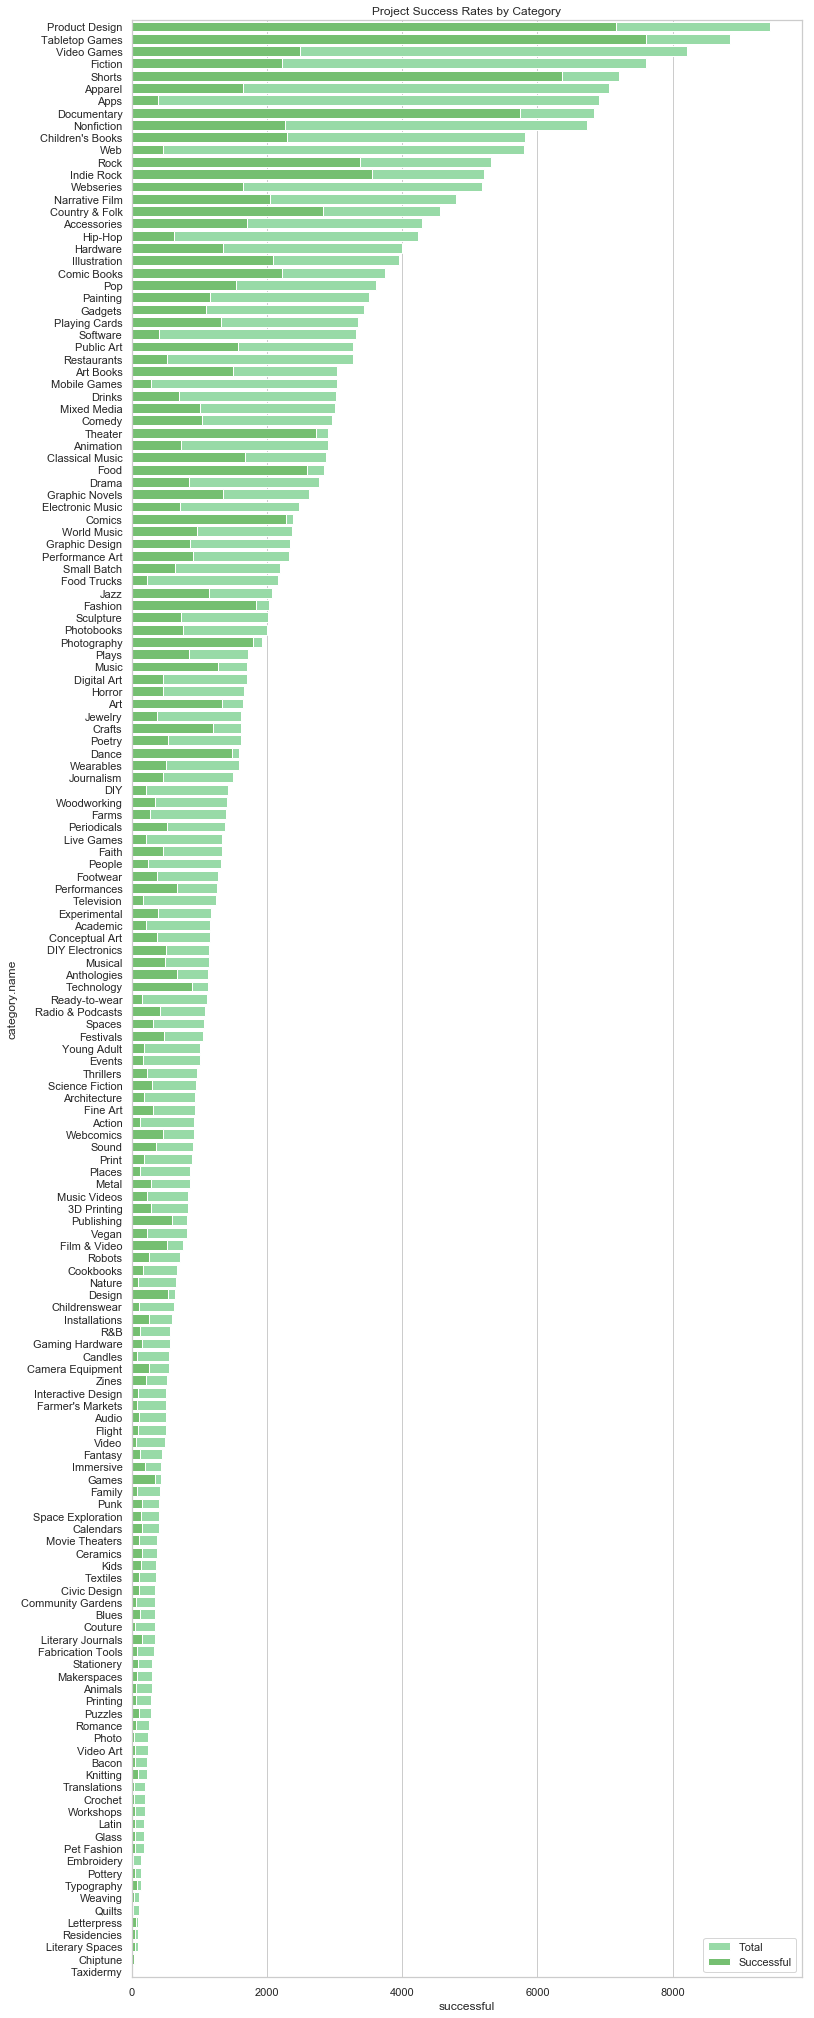

In [20]:

# Adapted from https://seaborn.pydata.org/examples/horizontal_barplot.html
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 36))

# Plot the total projects
sns.set_color_codes("pastel")
allcategories = success_by_category_name.sort_values(by='total', ascending=False).reset_index()
g = sns.barplot(x="total", y="category.name", data=allcategories, label="Total", color="g")

# Plot the successful projects
sns.set_color_codes("muted")
sns.barplot(x="successful", y="category.name", data=allcategories, label="Successful", color="g").set_title("Project Success Rates by Category")

# Add a legend and informative axis label
ax.legend();


In [22]:
success_by_category = pd.pivot_table(kickstarter, index='category.slug', columns='new_state', values='goal', aggfunc='count', fill_value = 0)
success_by_category['success_rate'] = success_by_category['successful'] / (success_by_category['failed'] + success_by_category['successful'])
success_by_category['success_rate'].sort_values(ascending=False).head(10)
;

''

In [23]:
success_by_category = pd.pivot_table(kickstarter, index='category.name', columns='new_state', values='category.slug', aggfunc='count', fill_value = 0)
success_by_category['success_rate'] = success_by_category['successful'] / (success_by_category['failed'] + success_by_category['successful'])

top10success = success_by_category['success_rate'].sort_values(ascending=False).head(10)
top10failure = success_by_category['success_rate'].sort_values(ascending=True).head(10)


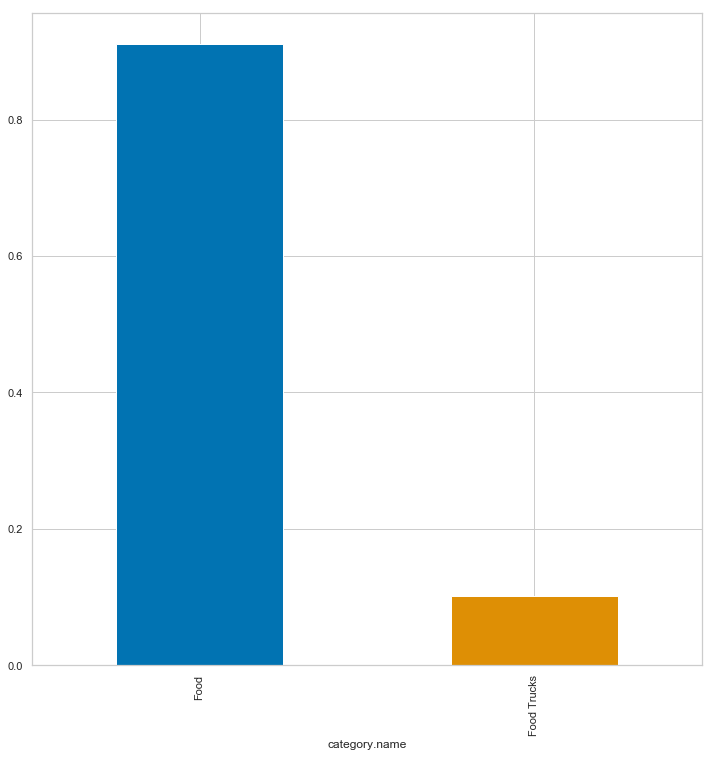

In [25]:
f, ax = plt.subplots(figsize=(12, 12))
success_by_category['success_rate'][['Food', 'Food Trucks']].plot('bar')
plt.show()

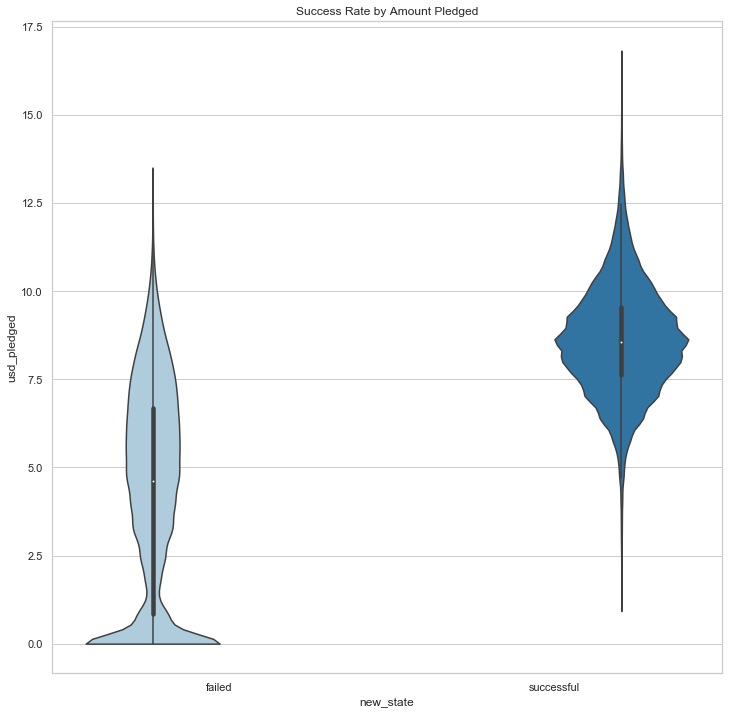

In [26]:
f, ax = plt.subplots(figsize=(12, 12))
plt = sns.violinplot(x=kickstarter["new_state"], 
                    y=np.log1p(kickstarter["usd_pledged"]), 
                    hue=kickstarter["new_state"], 
                    cut=0,
                    palette="Paired")
plt.get_legend().remove() #Legend wasn't doing anything so I removed it.
plt.set_title("Success Rate by Amount Pledged");

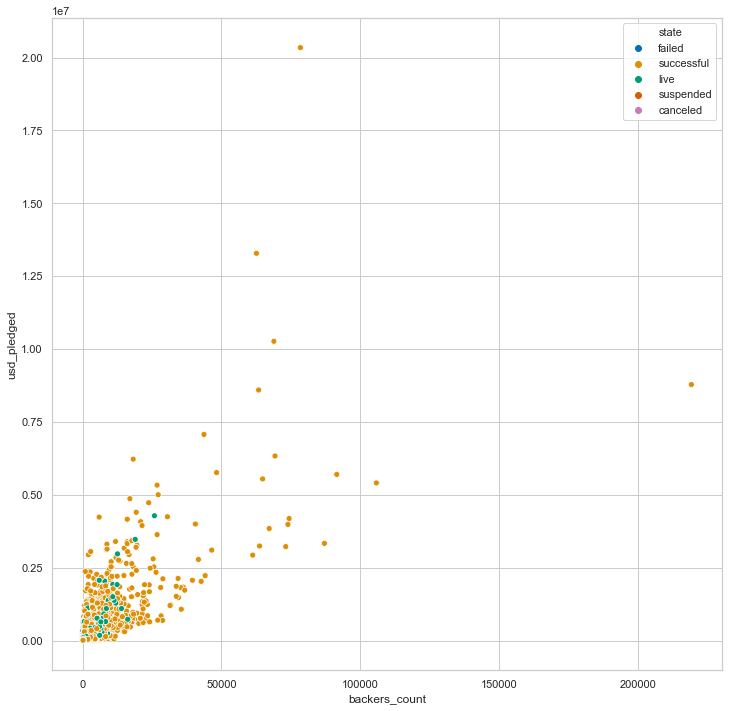

In [13]:
f, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(x="backers_count", y="usd_pledged", hue="state", data=kickstarter)

Text(0.5,1,'Amount Raised by Category')

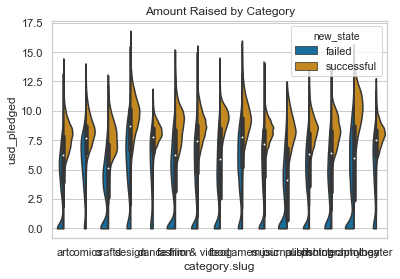

In [32]:

# Violin plot with category slug on X-axis, usd_pledged on Y-axis, colored by new state.
g = sns.violinplot(x=kickstarter["category.slug"], 
                    y=np.log1p(kickstarter["usd_pledged"]), 
                    hue=kickstarter["new_state"], 
                    cut=0, 
                    split=True,
                    aspect=3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=270)
g.set_title("Amount Raised by Category")

# Change margins of lower end of canvas

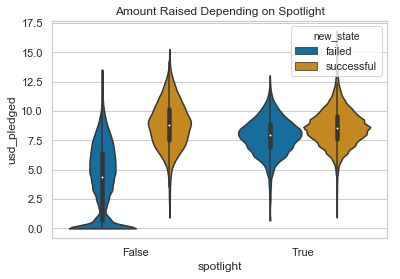

In [35]:
# It would be cool IF: One violin plot, one side "failed", other side "successful"
g = sns.violinplot(x=kickstarter["spotlight"], y=np.log1p(kickstarter["usd_pledged"]), hue=kickstarter["new_state"], cut=0)
g.set_title("Amount Raised Depending on Spotlight");

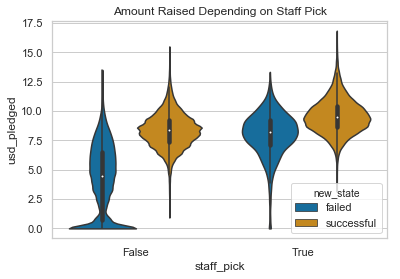

In [36]:
g = sns.violinplot(x=kickstarter["staff_pick"], y=np.log1p(kickstarter["usd_pledged"]), hue=kickstarter["new_state"], cut=0)
g.set_title("Amount Raised Depending on Staff Pick");

In [39]:
kickstarter['new_date']= pd.to_datetime(kickstarter['launched_at'], format = '%y%m')
kickstarter['new_date']= pd.to_datetime(kickstarter['launched_at'], format = '%y%m%d %H:%M:%S').dt.strftime('%y%m')
sums = kickstarter.groupby('new_date').sum()
sums.reset_index()
counts = kickstarter.groupby('new_date').count()
counts.reset_index(); #semicolon hides output

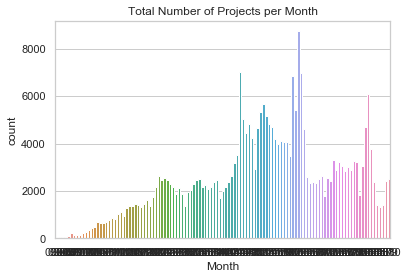

In [40]:
# Adapted from https://stackoverflow.com/questions/6682784/how-to-reduce-number-of-ticks-with-matplotlib
# X-axis still showing dates in yy/mm format
# Changing color so it's not rainbow
# Line chart?

count = sns.countplot(x='new_date', data=kickstarter)
count.set_title("Total Number of Projects per Month")
count.set_xlabel("Month")
f.autofmt_xdate()

every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)       

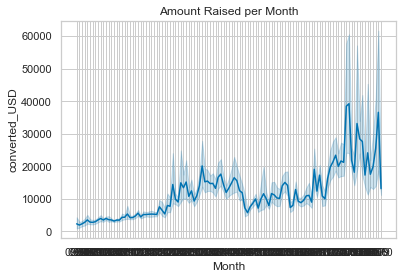

In [42]:
# Adapted from https://stackoverflow.com/questions/6682784/how-to-reduce-number-of-ticks-with-matplotlib
# X-axis still showing dates in yy/mm format
# Get rid of chart junk
g = sns.lineplot(x='new_date', y='converted_USD', data=kickstarter)
g.set_title("Amount Raised per Month")
g.set_xlabel("Month")
f.autofmt_xdate()

every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)